In [2]:
#Bibliothek

import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from PIL import Image
from sklearn.decomposition import PCA
from matplotlib import image as mimage

Min valor: 0, Max valor: 244


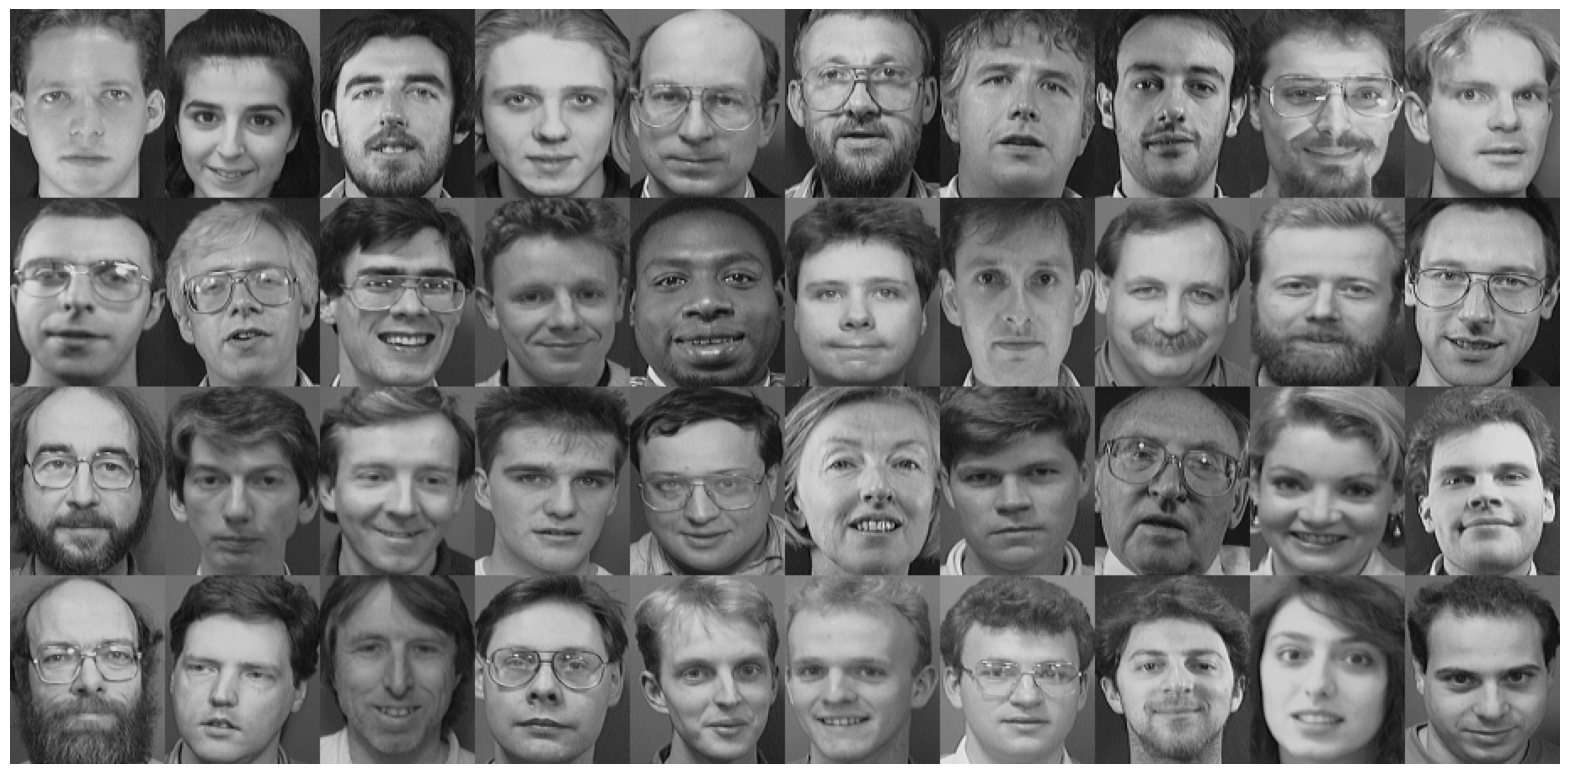

In [3]:
#Plota 01 imagen de cada pessoa (40)
# Configuração dos parâmetros de plotagem
plt.rcParams['figure.figsize'] = [20, 15]  # Ajuste conforme necessário
plt.rcParams.update({'font.size': 10})

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Obter as pastas de cada pessoa
person_folders = sorted([f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))])

# Definir o tamanho da imagem e a grade
num_people = len(person_folders)
image_size = (112, 92)  # As dimensões padrão das imagens do AT&T Faces Dataset

# Definir o número de imagens por linha
images_per_row = 10
num_rows = (num_people + images_per_row - 1) // images_per_row  # Calcula o número de linhas necessárias

# Inicializar a matriz para armazenar as imagens
allPersons = np.zeros((num_rows * image_size[0], images_per_row * image_size[1]), dtype=np.uint8)

for idx, person_folder in enumerate(person_folders):
    # Caminho para a pasta da pessoa
    person_path = os.path.join(base_dir, person_folder)
    
    # Obter a lista de imagens
    images = sorted([f for f in os.listdir(person_path) if f.endswith('.pgm')])
    
    if images:
        img_path = os.path.join(person_path, images[0])
        img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
        img_array = np.array(img)

        # Verificar dimensões da imagem
        if img_array.shape != image_size:
            raise ValueError(f"A imagem {img_path} tem dimensões {img_array.shape}, esperado {image_size}")

        # Calcular posição na matriz
        row = idx // images_per_row
        col = idx % images_per_row
        start_row = row * image_size[0]
        end_row = (row + 1) * image_size[0]
        start_col = col * image_size[1]
        end_col = (col + 1) * image_size[1]

        # Colocar a imagem na matriz final
        allPersons[start_row:end_row, start_col:end_col] = img_array

# Verificar o intervalo de valores da matriz
print(f"Min valor: {np.min(allPersons)}, Max valor: {np.max(allPersons)}")

# Plotar a imagem
plt.imshow(allPersons, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Min valor: 0, Max valor: 251


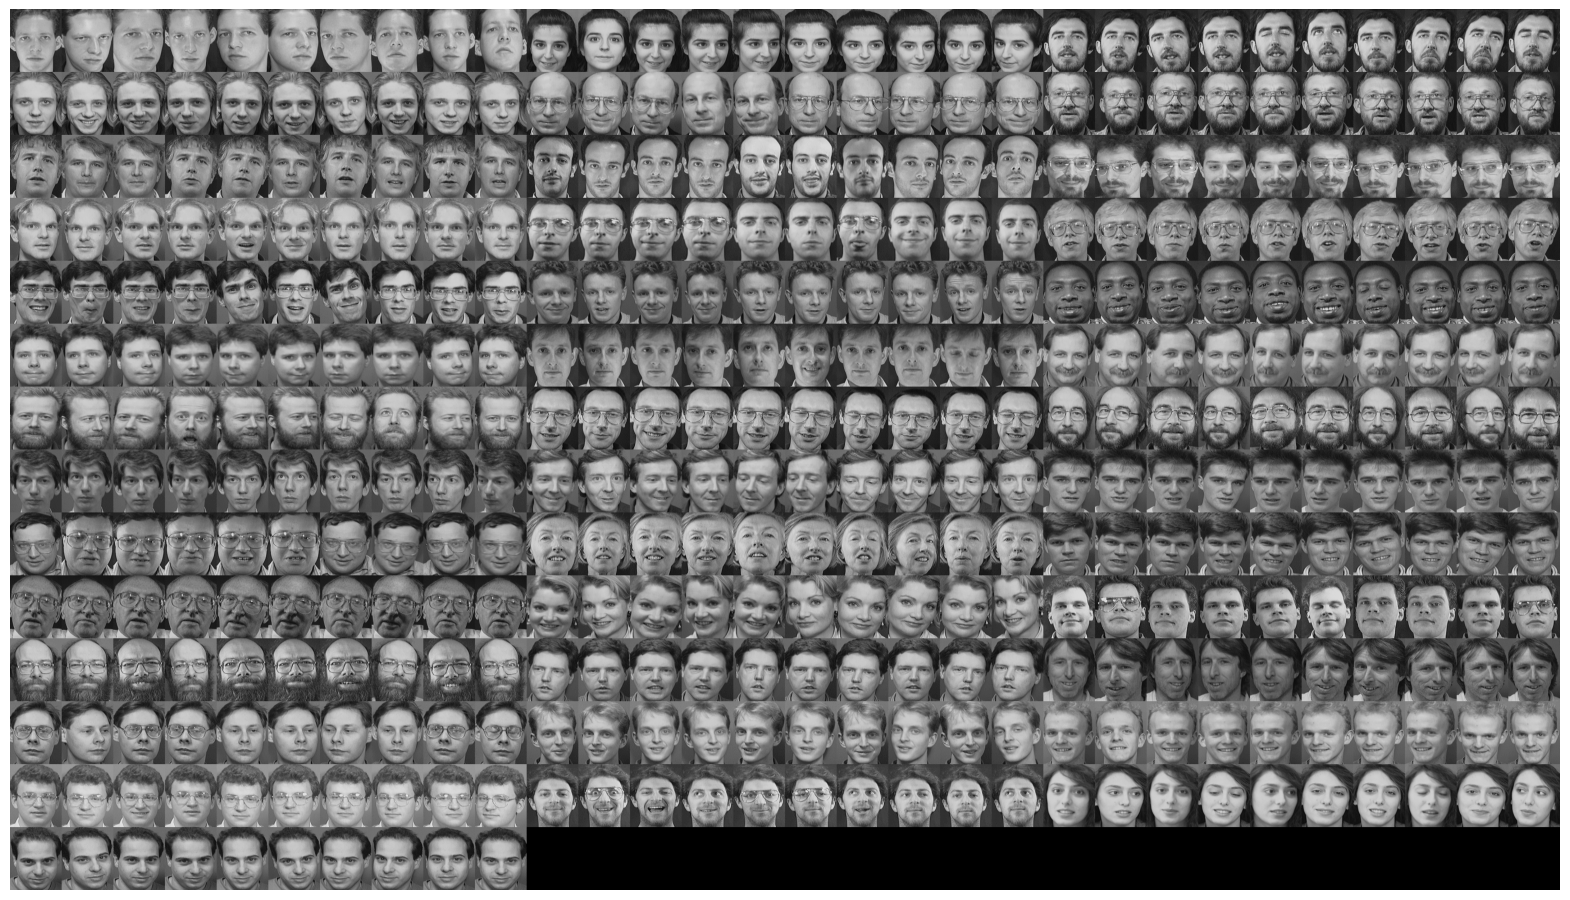

In [4]:
#PLOTA TODAS AS IMAGENS

# Configuração dos parâmetros de plotagem
plt.rcParams['figure.figsize'] = [20, 15]  # Ajuste conforme necessário
plt.rcParams.update({'font.size': 10})

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Obter as pastas de cada pessoa
person_folders = sorted([f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))])

# Definir o tamanho da imagem e a grade
image_size = (112, 92)  # As dimensões padrão das imagens do AT&T Faces Dataset
images_per_row = 30  # Número de imagens por linha

# Inicializar a lista para armazenar as imagens
image_list = []

for person_folder in person_folders:
    # Caminho para a pasta da pessoa
    person_path = os.path.join(base_dir, person_folder)
    
    # Obter a lista de imagens
    images = sorted([f for f in os.listdir(person_path) if f.endswith('.pgm')])
    
    # Adicionar as imagens à lista
    for image_name in images[:10]:  # Pega as 10 primeiras imagens de cada pessoa
        img_path = os.path.join(person_path, image_name)
        img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
        img_array = np.array(img)
        
        # Verificar dimensões da imagem
        if img_array.shape != image_size:
            raise ValueError(f"A imagem {img_path} tem dimensões {img_array.shape}, esperado {image_size}")
        
        image_list.append(img_array)

# Calcular o número total de imagens
num_images = len(image_list)
num_rows = (num_images + images_per_row - 1) // images_per_row  # Calcula o número de linhas necessárias

# Inicializar a matriz para armazenar todas as imagens
allImages = np.zeros((num_rows * image_size[0], images_per_row * image_size[1]), dtype=np.uint8)

for idx, img_array in enumerate(image_list):
    row = idx // images_per_row
    col = idx % images_per_row
    start_row = row * image_size[0]
    end_row = (row + 1) * image_size[0]
    start_col = col * image_size[1]
    end_col = (col + 1) * image_size[1]

    # Colocar a imagem na matriz final
    allImages[start_row:end_row, start_col:end_col] = img_array

# Verificar o intervalo de valores da matriz
print(f"Min valor: {np.min(allImages)}, Max valor: {np.max(allImages)}")

# Plotar a imagem
plt.imshow(allImages, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Shape of X: (400, 10304)
Shape of PCA components: (400, 10304)


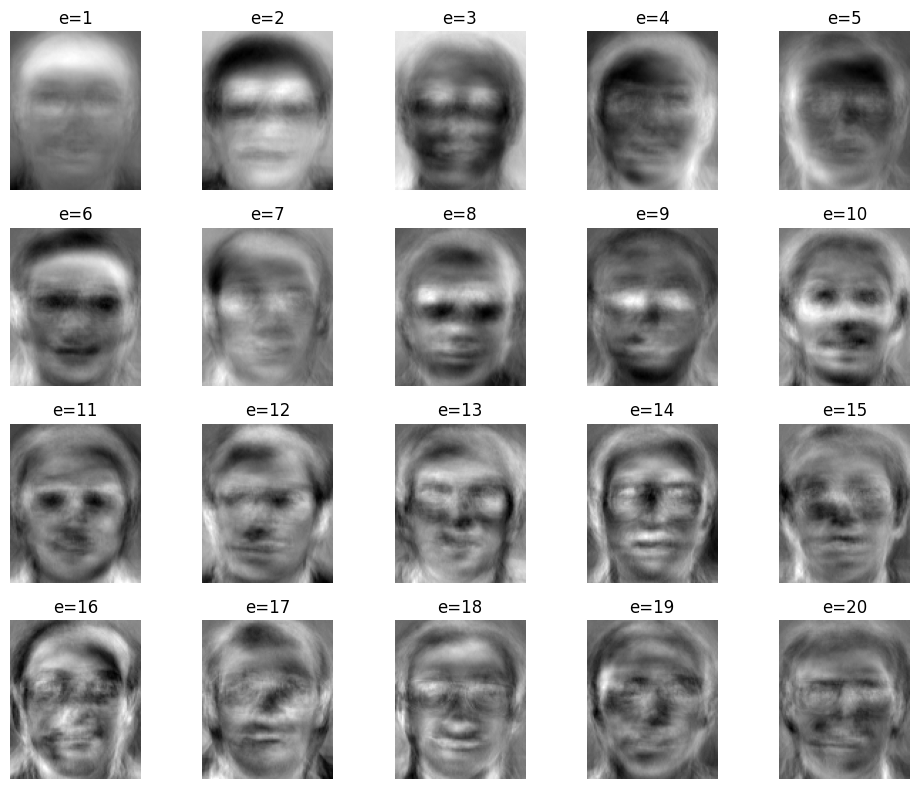

Imagem salva em ./eigenfaceshumans.png


In [5]:
#CONSTRUIR EIGENFACES BASE FOR ALL IMAGES

#COMPUTING EIGENFACES

# X = U SOMATORIO V ^T
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Obter as pastas de cada pessoa
person_folders = sorted([f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))])

# Definir o tamanho da imagem
image_size = (112, 92)  # As dimensões padrão das imagens do AT&T Faces Dataset
image_shape = np.prod(image_size)  # Número total de pixels por imagem

# Inicializar a lista para armazenar as imagens
image_list = []

for person_folder in person_folders:
    person_path = os.path.join(base_dir, person_folder)
    images = sorted([f for f in os.listdir(person_path) if f.endswith('.pgm')])
    for image_name in images[:10]:  # Pega as 10 primeiras imagens de cada pessoa
        img_path = os.path.join(person_path, image_name)
        img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
        img_array = np.array(img).flatten()  # Achata a imagem
        image_list.append(img_array)

# Convertendo a lista para um array numpy
X = np.array(image_list)

print(f"Shape of X: {X.shape}")

# Calcular o PCA
n_components = min(X.shape[0], X.shape[1])  # Número máximo de componentes que podemos calcular
pca = PCA(n_components=n_components)
pca.fit(X)

print(f"Shape of PCA components: {pca.components_.shape}")

# Visualizar e salvar as primeiras eigenfaces
def plot_eigenfaces(eigenvectors, image_shape, num_eigenfaces, output_path):
    num_cols = 5  # Número de colunas
    num_rows = (num_eigenfaces + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    
    for i in range(num_eigenfaces):
        plt.subplot(num_rows, num_cols, i + 1)
        eigenface = eigenvectors[i].reshape(image_shape)
        # Normalizar a eigenface para o intervalo [0, 1]
        eigenface = (eigenface - eigenface.min()) / (eigenface.max() - eigenface.min())
        plt.imshow(eigenface, cmap='gray', vmin=0, vmax=1)
        plt.title(f'e={i + 1}')
        plt.axis('off')
    
    plt.tight_layout()
    
    # Exibir a figura
    plt.show()
    
    # Salvar a figura
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    print(f"Imagem salva em {output_path}")
    
    plt.close()  # Fechar a figura

# Salvar e plotar as eigenfaces
output_path = './eigenfaceshumans.png'
plot_eigenfaces(pca.components_, image_size, num_eigenfaces=20, output_path=output_path)


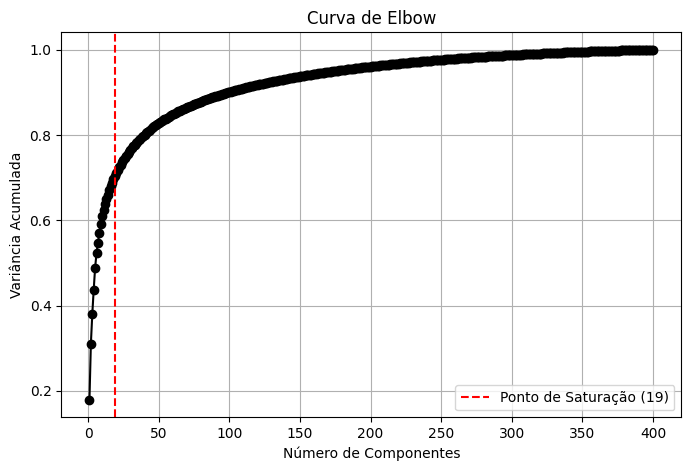

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Obter as pastas de cada pessoa
person_folders = sorted([f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))])

# Definir o tamanho da imagem
image_size = (112, 92)  # As dimensões padrão das imagens do AT&T Faces Dataset
image_shape = np.prod(image_size)  # Número total de pixels por imagem

# Inicializar a lista para armazenar as imagens
image_list = []

for person_folder in person_folders:
    person_path = os.path.join(base_dir, person_folder)
    images = sorted([f for f in os.listdir(person_path) if f.endswith('.pgm')])
    for image_name in images[:10]:  # Pega as 10 primeiras imagens de cada pessoa
        img_path = os.path.join(person_path, image_name)
        img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
        img = img.resize(image_size)  # Redimensiona a imagem, se necessário
        img_array = np.array(img).flatten()  # Achata a imagem
        image_list.append(img_array)

# Convertendo a lista para um array numpy
X = np.array(image_list)

# Verificar se X tem pelo menos 2 dimensões
if len(X.shape) != 2:
    raise ValueError("O array X não tem o formato esperado. Verifique o carregamento das imagens.")

# Calcular o PCA
n_components = min(X.shape[0], X.shape[1])  # Número máximo de componentes que podemos calcular
pca = PCA(n_components=n_components)
pca.fit(X)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Variância acumulada
cumulative_variance = np.cumsum(explained_variance)

# Encontrar o ponto de saturação (cotovelo)
threshold = 0.70  # Por exemplo, 70% de variância explicada
elbow_point = np.argmax(cumulative_variance >= threshold) + 1

# Plotar a Curva de Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='black', marker='o', linestyle='-')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Ponto de Saturação ({elbow_point})')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Curva de Elbow')
plt.legend()
plt.grid(True)
plt.show()


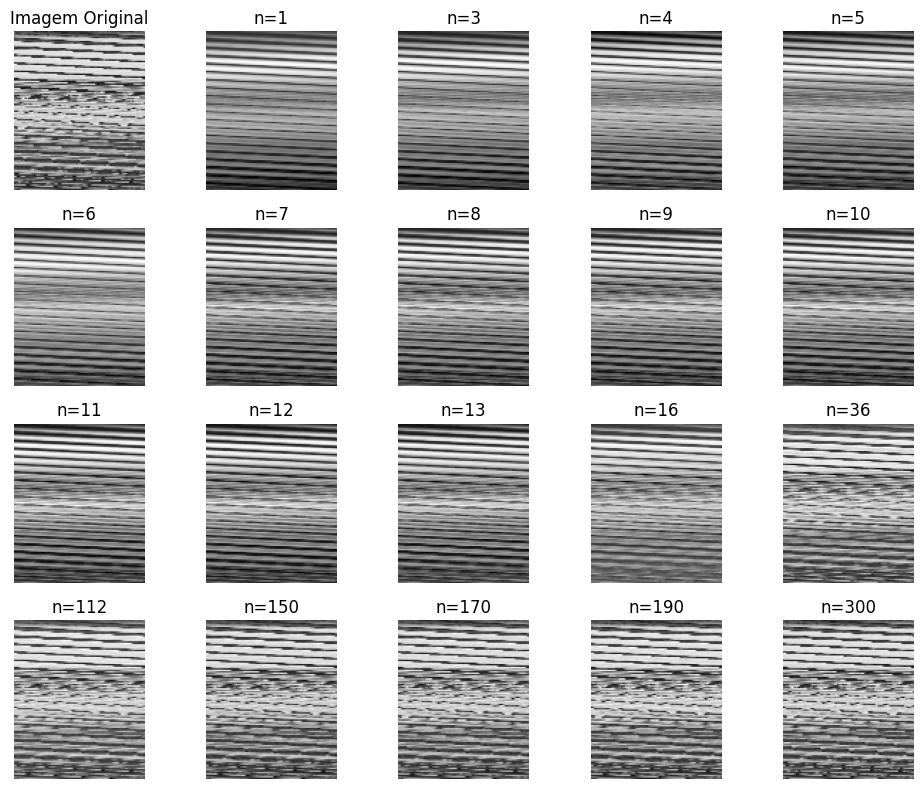

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Função para reconstruir uma imagem a partir dos componentes principais
def reconstruct_image(original_image, pca, r):
    # Projete a imagem original para o espaço dos componentes principais
    X_transformed = pca.transform([original_image])
    
    # Use apenas os primeiros r componentes principais
    X_reduced = X_transformed[:, :r]
    
    # Reconstruir a imagem usando os r componentes principais
    X_reconstructed = np.dot(X_reduced, pca.components_[:r, :]) + pca.mean_
    
    return X_reconstructed[0]

# Função para plotar imagens reconstruídas com diferentes valores de r
def plot_reconstructions(original_image, pca, image_shape, r_values):
    num_plots = len(r_values) + 1
    num_cols = 5  # Número de colunas
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    
    # Plotar a imagem original
    plt.subplot(num_rows, num_cols, 1)
    plt.imshow(original_image.reshape(image_shape), cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')
    
    # Plotar imagens reconstruídas
    for i, r in enumerate(r_values):
        if r > pca.n_components_:
            r = pca.n_components_  # Garante que r não exceda o número de componentes principais
        reconstructed_image = reconstruct_image(original_image, pca, r)
        
        plt.subplot(num_rows, num_cols, i + 2)
        plt.imshow(reconstructed_image.reshape(image_shape), cmap='gray')
        plt.title(f'n={r}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Escolher uma imagem para reconstrução
original_image = X[10]  # Pode ser qualquer imagem da lista

# Valores de r para a reconstrução
r_values = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 36, 112, 150, 170, 190, 300]

# Plotar reconstruções
plot_reconstructions(original_image, pca, image_size, r_values)

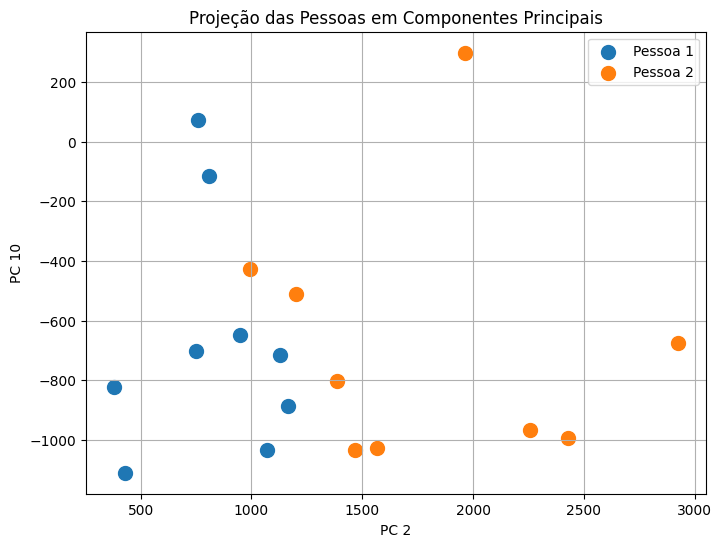

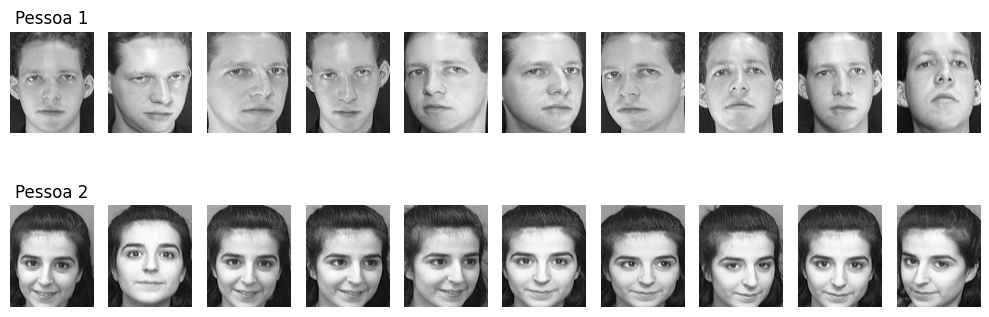

In [21]:
#Projeta 2 pessoas em componentes e as imagens

import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.decomposition import PCA

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Função para carregar imagens de uma pasta
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        if img.ndim == 3:  # Converter para escala de cinza se necessário
            img = rgb2gray(img)
        img = img.flatten()  # Achatar a imagem
        images.append(img)
    return np.array(images)

# Função para carregar todas as imagens
def load_all_images(base_dir):
    all_images = []
    labels = []
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)
        if os.path.isdir(folder_path):
            images = load_images_from_folder(folder_path)
            all_images.append(images)
            labels.extend([folder_name] * len(images))
    all_images = np.concatenate(all_images, axis=0)
    return all_images, labels

# Função para projetar e plotar
def project_and_plot(faces, pca, person_indices, pc_modes):
    # Centralizar as imagens
    avgface = np.mean(faces, axis=0)
    centered_faces = faces - avgface

    # Obter imagens das pessoas selecionadas
    projections = []
    for person_idx in person_indices:
        start_idx = person_idx * 9
        end_idx = start_idx + 9
        person_faces = centered_faces[start_idx:end_idx]  # Imagens da pessoa
        person_projection = pca.transform(person_faces)
        reduced_projection = person_projection[:, pc_modes]
        projections.append(reduced_projection)
    
    # Plotar as projeções
    plt.figure(figsize=(8, 6))
    
    for i, projection in enumerate(projections):
        plt.scatter(projection[:, 0], projection[:, 1], label=f'Pessoa {person_indices[i] + 1}', s=100)
    
    plt.xlabel(f'PC {pc_modes[0] + 1}')
    plt.ylabel(f'PC {pc_modes[1] + 1}')
    plt.title('Projeção das Pessoas em Componentes Principais')
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para plotar as imagens das pessoas em um mosaico
def plot_person_images(faces, num_persons, img_shape):
    num_images_per_person = 10
    plt.figure(figsize=(10, num_persons * 2))  # Ajusta o tamanho da figura conforme o número de pessoas
    
    for i in range(num_persons):
        start_idx = i * num_images_per_person
        end_idx = start_idx + num_images_per_person
        for j in range(num_images_per_person):
            img_idx = start_idx + j
            img = faces[img_idx].reshape(img_shape)
            plt.subplot(num_persons, num_images_per_person, i * num_images_per_person + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(f'Pessoa {i + 1}')
    
    plt.tight_layout()
    plt.show()

# Carregar imagens
faces, labels = load_all_images(base_dir)

# Ajustar PCA
pca = PCA(n_components=10)
avgface = np.mean(faces, axis=0)
centered_faces = faces - avgface
pca.fit(centered_faces)

# Índices das pessoas a projetar e os componentes principais
person_indices = [0, 1]  # Índices das pessoas (0-indexado, então Pessoa 1 é 0, Pessoa 2 é 1)
pc_modes = [1, 9]        # Componentes principais a serem usadas (0-indexado, então PC2 e PC10 são 1 e 9)

# Projeção e plotagem
project_and_plot(faces, pca, person_indices, pc_modes)

# Plotar as imagens das pessoas 1 e 2 (total de 18 imagens, 9 para cada pessoa)
num_persons = len(person_indices)
img_shape = (112, 92)  # Ajuste o tamanho conforme o tamanho das suas imagens
plot_person_images(faces, num_persons, img_shape)

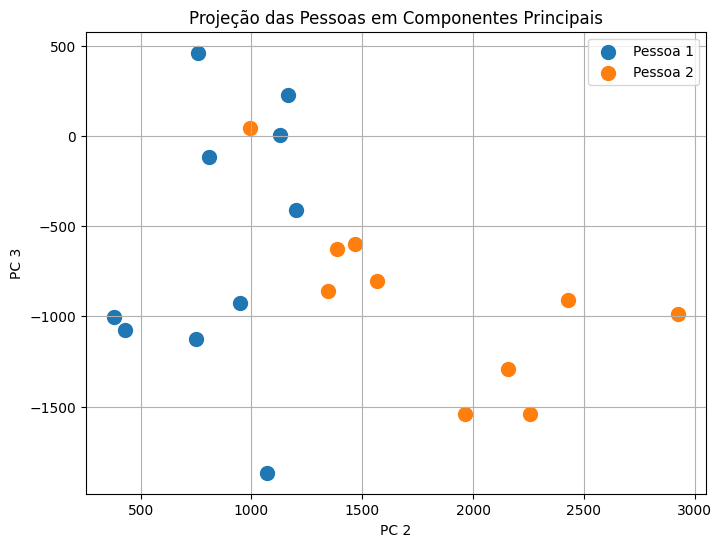

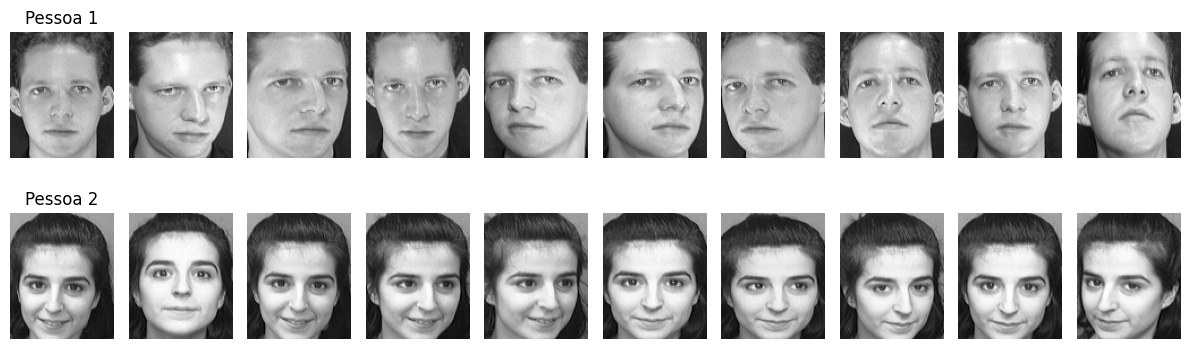

In [22]:
#Plota grafico

import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.decomposition import PCA

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Função para carregar imagens de uma pasta
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        if img.ndim == 3:  # Converter para escala de cinza se necessário
            img = rgb2gray(img)
        img = img.flatten()  # Achatar a imagem
        images.append(img)
    return np.array(images)

# Função para carregar todas as imagens
def load_all_images(base_dir):
    all_images = []
    labels = []
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)
        if os.path.isdir(folder_path):
            images = load_images_from_folder(folder_path)
            all_images.append(images)
            labels.extend([folder_name] * len(images))
    all_images = np.concatenate(all_images, axis=0)
    return all_images, labels

# Função para projetar e plotar
def project_and_plot(faces, pca, person_indices, pc_modes):
    # Centralizar as imagens
    avgface = np.mean(faces, axis=0)
    centered_faces = faces - avgface

    # Obter imagens das pessoas selecionadas
    projections = []
    colors = []
    for person_idx in person_indices:
        start_idx = person_idx * 10
        end_idx = start_idx + 10
        person_faces = centered_faces[start_idx:end_idx]  # Imagens da pessoa
        person_projection = pca.transform(person_faces)
        reduced_projection = person_projection[:, pc_modes]
        projections.append(reduced_projection)
        colors.extend([person_idx] * 10)  # Adiciona cor correspondente para cada imagem
    
    # Plotar as projeções
    plt.figure(figsize=(8, 6))
    
    all_projections = np.vstack(projections)
    # Definindo cores
    unique_indices = np.unique(colors)
    color_map = plt.get_cmap('tab10')
    for idx in unique_indices:
        plt.scatter(all_projections[np.array(colors) == idx, 0], 
                    all_projections[np.array(colors) == idx, 1], 
                    label=f'Pessoa {idx + 1}', 
                    color=color_map(idx), 
                    s=100)
    
    plt.xlabel(f'PC {pc_modes[0] + 1}')
    plt.ylabel(f'PC {pc_modes[1] + 1}')
    plt.title('Projeção das Pessoas em Componentes Principais')
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para plotar as imagens das pessoas em um mosaico
def plot_person_images(faces, person_indices, img_shape):
    num_images_per_person = 10
    num_persons = len(person_indices)
    plt.figure(figsize=(12, num_persons * 2))  # Ajusta o tamanho da figura conforme o número de pessoas
    
    for i, person_idx in enumerate(person_indices):
        start_idx = person_idx * num_images_per_person
        end_idx = start_idx + num_images_per_person
        for j in range(num_images_per_person):
            img_idx = start_idx + j
            img = faces[img_idx].reshape(img_shape)
            plt.subplot(num_persons, num_images_per_person, i * num_images_per_person + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(f'Pessoa {person_idx + 1}')
    
    plt.tight_layout()
    plt.show()

# Carregar imagens
faces, labels = load_all_images(base_dir)

# Ajustar PCA
pca = PCA(n_components=50)
avgface = np.mean(faces, axis=0)
centered_faces = faces - avgface
pca.fit(centered_faces)

# Índices das pessoas a projetar e os componentes principais
person_indices = [0, 1]  # Índices das pessoas (0-indexado, então Pessoa 1 é 0, Pessoa 2 é 1)
pc_modes = [1, 2]        # Componentes principais a serem usadas (0-indexado, então PC2 e PC3 são 1 e 2)

# Projeção e plotagem
project_and_plot(faces, pca, person_indices, pc_modes)

# Plotar as imagens das pessoas 1 e 2 (total de 20 imagens, 10 para cada pessoa)
img_shape = (112, 92)  # Ajuste o tamanho conforme o tamanho das suas imagens
plot_person_images(faces, person_indices, img_shape)


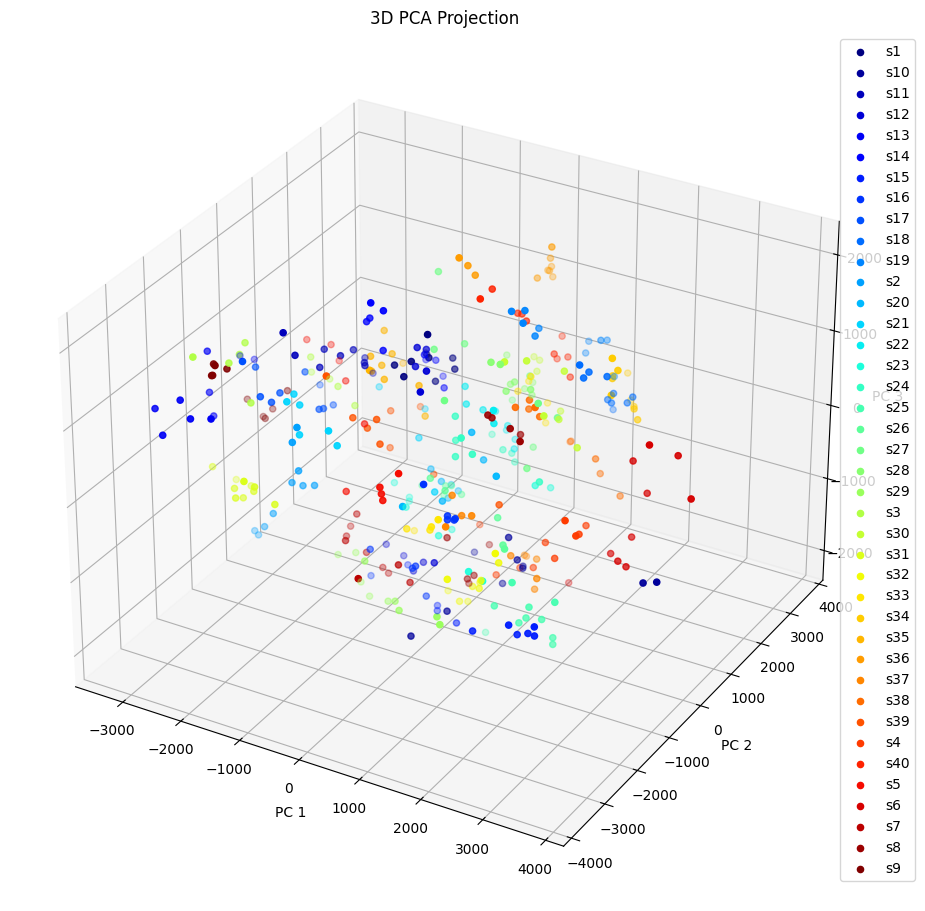

In [23]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponha que você já tenha seus dados PCA em X_pca e labels originais em 'labels'

# Calcular o PCA
n_components = min(X.shape[0], X.shape[1])  # Número máximo de componentes que podemos calcular
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Ajustar o encoder com as etiquetas originais e transformar em numéricas
labels_numeric = label_encoder.fit_transform(labels)

# Função para plotar PCA em 3D
def plot_pca_3d(pca_data, labels, label_encoder):
    fig = plt.figure(figsize=(14, 10))  # Aumenta o tamanho da figura
    ax = fig.add_subplot(111, projection='3d')

    # Número de classes
    num_classes = len(np.unique(labels))
    colors = plt.cm.jet(np.linspace(0, 1, num_classes))  # Cores diferentes para cada classe

    # Obter o mapeamento inverso de labels
    labels_inverse = label_encoder.inverse_transform(np.unique(labels))

    # Criar um dicionário para mapear rótulos para cores
    label_to_color = {label: colors[i % num_classes] for i, label in enumerate(labels_inverse)}

    # Ordenar os rótulos para a legenda
    sorted_labels = sorted(labels_inverse)

    # Plotar os dados com cores diferentes
    for label in sorted_labels:
        mask = labels == label_encoder.transform([label])[0]
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1], pca_data[mask, 2], 
                   color=label_to_color[label],  # Usar a cor do rótulo
                   label=label, marker='o')

    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    ax.set_title('3D PCA Projection')

    # Adiciona a legenda
    ax.legend(loc='best', bbox_to_anchor=(1.05, 1))

    # Melhorar o layout
    plt.tight_layout()
    plt.show()

# Plotar as componentes principais em 3D com labels convertidos
plot_pca_3d(X_pca, labels_numeric, label_encoder)


In [24]:
#Calcula distância e plota
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import os
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

# Diretório das imagens
base_dir = './pgm_images'

# Função para carregar e redimensionar imagens de uma pasta
def load_images_from_folder(folder, target_size):
    images = []
    labels = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        if img.ndim == 3:
            img = rgb2gray(img)
        
        img_resized = resize(img, target_size, anti_aliasing=True)
        img_flattened = img_resized.flatten()
        images.append(img_flattened)
        
        if filename.startswith('elip'):
            labels.append('elip')
        elif filename.startswith('spiral'):
            labels.append('spiral')
        elif filename.startswith('lenticular'):  # Adicionando a nova classe
            labels.append('lenticular')
    
    return np.array(images), np.array(labels)

# Função para calcular os centróides das classes
def compute_class_centroids(X_pca, labels):
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        class_data = X_pca[labels == label]
        centroid = np.mean(class_data, axis=0)
        centroids.append(centroid)
    return np.array(centroids), unique_labels

# Função para calcular distâncias entre centroides
def calculate_distances_between_centroids(centroids):
    return euclidean_distances(centroids, centroids)

# Definir o tamanho esperado das imagens
target_size = (128, 128)

# Carregar imagens
images, labels = load_images_from_folder(base_dir, target_size)

# Verifique se labels são strings e converta para índices numéricos para operações
unique_labels, labels_indices = np.unique(labels, return_inverse=True)

# Aplicar PCA para 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(images)

# Calcular distâncias entre todos os pontos
distances = euclidean_distances(X_pca, X_pca)

# Calcular centroides e distâncias entre centroides
centroids, unique_labels = compute_class_centroids(X_pca, labels_indices)
centroid_distances = calculate_distances_between_centroids(centroids)

# Exibir algumas distâncias
print("Distâncias entre todos os pontos:")
print(distances)

print("\nDistâncias entre centroides das classes:")
for i, label in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i != j:
            print(f"Distância entre centroides de {label} e {label2}: {centroid_distances[i, j]:.2f}")

print("\nMatriz de distâncias entre centroides:")
print(centroid_distances)

Distâncias entre todos os pontos:
[[ 0.          0.73552064  1.35978337 ...  9.67149408 19.48099671
  12.09515238]
 [ 0.73552064  0.          1.20786347 ...  9.30900926 19.06025837
  11.66883299]
 [ 1.35978337  1.20786347  0.         ... 10.20809776 20.10621482
  12.30262832]
 ...
 [ 9.67149408  9.30900926 10.20809776 ...  0.         11.39212442
   3.81657146]
 [19.48099671 19.06025837 20.10621482 ... 11.39212442  0.
  12.27742814]
 [12.09515238 11.66883299 12.30262832 ...  3.81657146 12.27742814
   0.        ]]

Distâncias entre centroides das classes:
Distância entre centroides de 0 e 1: 5.13
Distância entre centroides de 0 e 2: 10.83
Distância entre centroides de 1 e 0: 5.13
Distância entre centroides de 1 e 2: 10.31
Distância entre centroides de 2 e 0: 10.83
Distância entre centroides de 2 e 1: 10.31

Matriz de distâncias entre centroides:
[[ 0.          5.13294868 10.82898524]
 [ 5.13294868  0.         10.31493588]
 [10.82898524 10.31493588  0.        ]]


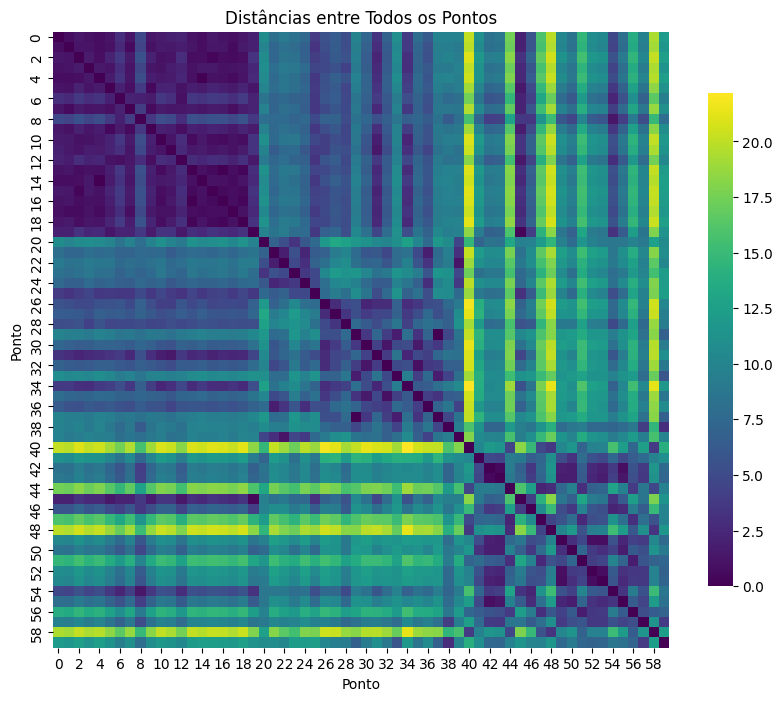

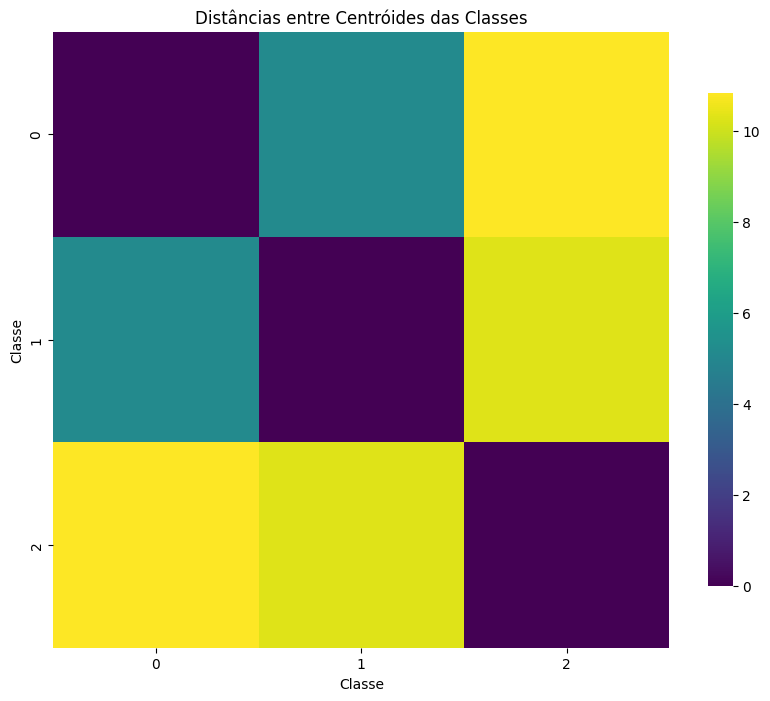

In [25]:
# Plotar matriz de distâncias entre todos os pontos
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='viridis', square=True, cbar_kws={'shrink': .8})
plt.title('Distâncias entre Todos os Pontos')
plt.xlabel('Ponto')
plt.ylabel('Ponto')
plt.show()

# Plotar matriz de distâncias entre centroides das classes
plt.figure(figsize=(10, 8))
sns.heatmap(centroid_distances, cmap='viridis', square=True, cbar_kws={'shrink': .8})
plt.title('Distâncias entre Centróides das Classes')
plt.xlabel('Classe')
plt.ylabel('Classe')
plt.show()